## **Bike Sharing Demand Prediction**

Project Type - Regression


Submitted by- Ankit

## **Problem Statement**
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes

In [2]:
# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from numpy import math
#For handling date column
from datetime import datetime

#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import plotly.express as x

#For feature selection
from sklearn import feature_selection
from statsmodels.stats.outliers_influence import variance_inflation_factor


<ipython-input-2-b52d0ae51520>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
day_df=pd.read_csv('/content/drive/MyDrive/day.csv')
hour_df=pd.read_csv('/content/drive/MyDrive/hour.csv')

Dataset First View

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
day_df.shape,hour_df.shape

((731, 16), (17379, 17))

Dataset Information

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [23]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
day_df.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
hour_df.isnull()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17375,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17376,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17377,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Dataset Describe

In [18]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Variables Description**

*  datetime - hourly date + timestamp
*  season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
*  holiday - whether the day is considered a holiday
*  workingday - whether the day is neither a weekend nor holiday
*  weather - `1: Clear, Few clouds, Partly cloudy, Partly cloudy. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*  temp - temperature in Celsius
*  atemp - "feels like" temperature in Celsius
*  humidity - relative humidity
*  windspeed - wind speed
*  casual - number of non-registered user rentals initiated
*  registered - number of registered user rentals initiated
*  count - number of total rentals





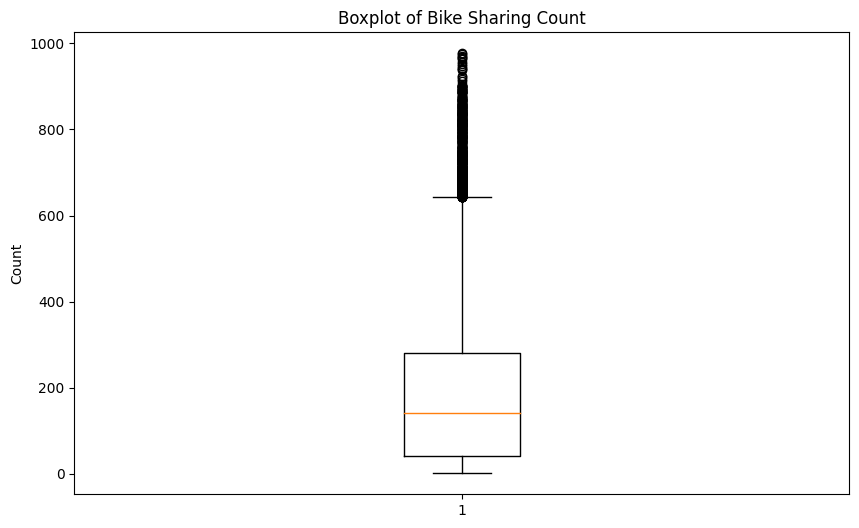

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot(hour_df['cnt'])
plt.title('Boxplot of Bike Sharing Count')
plt.ylabel('Count')
plt.show()


In [25]:
# Calculate the z-scores for each data point in the "count" variable
z_scores = (hour_df['cnt'] - hour_df['cnt'].mean()) / hour_df['cnt'].std()

In [26]:
# Identify outliers based on a threshold (e.g., z-score > 3)
outliers = hour_df[z_scores > 3]

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
10383    10384  2012-03-13       1   1     3  18        0        2   
10406    10407  2012-03-14       1   1     3  17        0        3   
10407    10408  2012-03-14       1   1     3  18        0        3   
10431    10432  2012-03-15       1   1     3  18        0        4   
10527    10528  2012-03-19       1   1     3  18        0        1   
...        ...         ...     ...  ..   ...  ..      ...      ...   
15828    15829  2012-10-26       4   1    10  17        0        5   
15848    15849  2012-10-27       4   1    10  13        0        6   
15849    15850  2012-10-27       4   1    10  14        0        6   
16726    16727  2012-12-04       4   1    12  17        0        2   
16741    16742  2012-12-05       4   1    12   8        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
10383           1           1  0.70  0.6364  0.34     0.2985      96   
10406

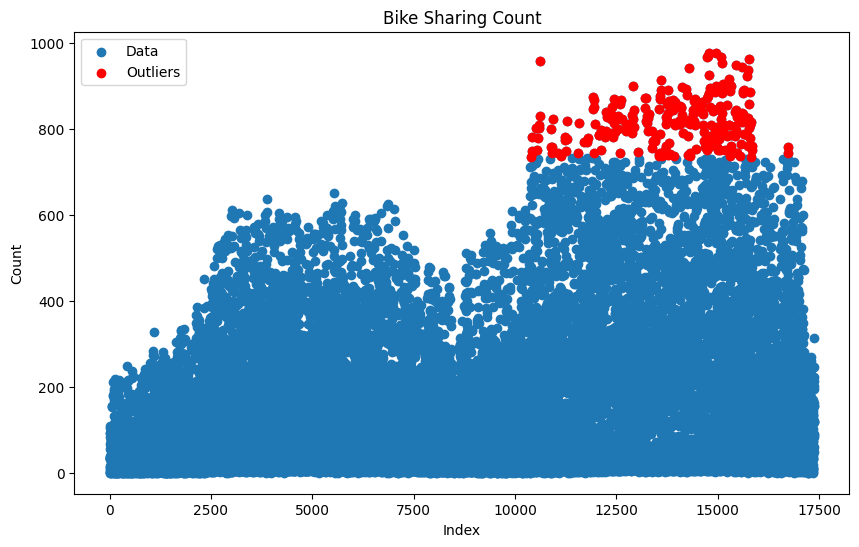

In [27]:
# Visualize the outliers
plt.figure(figsize=(10, 6))
plt.scatter(hour_df.index, hour_df['cnt'], label='Data')
plt.scatter(outliers.index, outliers['cnt'], color='red', label='Outliers')
plt.title('Bike Sharing Count')
plt.xlabel('Index')
plt.ylabel('Count')
plt.legend()
plt.show()


Handling outliers

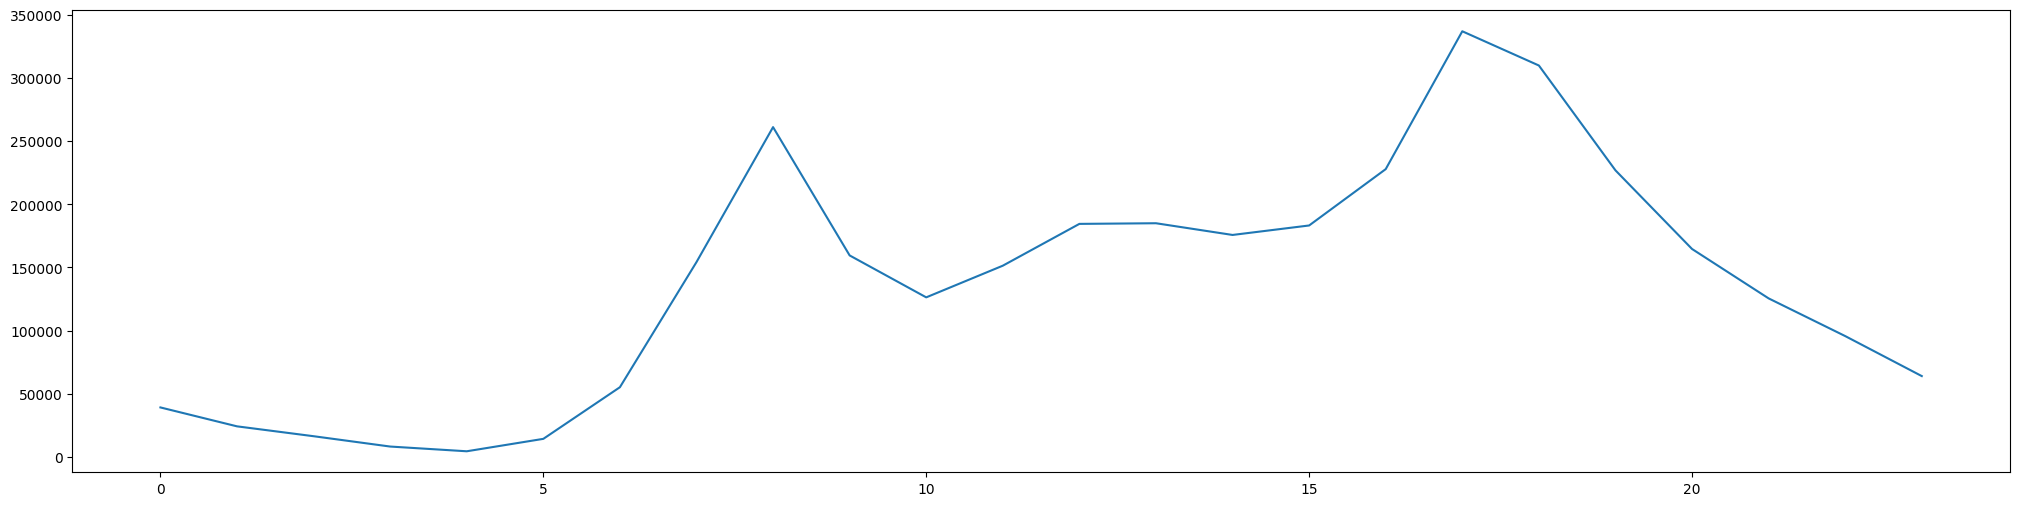

In [28]:
#lineplot of datewise bike sharing demand
count_date=hour_df.groupby(['hr'])['cnt'].sum().reset_index()
fig = plt.figure(figsize=(25,6))
ax = plt.axes()
x = count_date['hr']
ax.plot(x, count_date['cnt'])
plt.show()

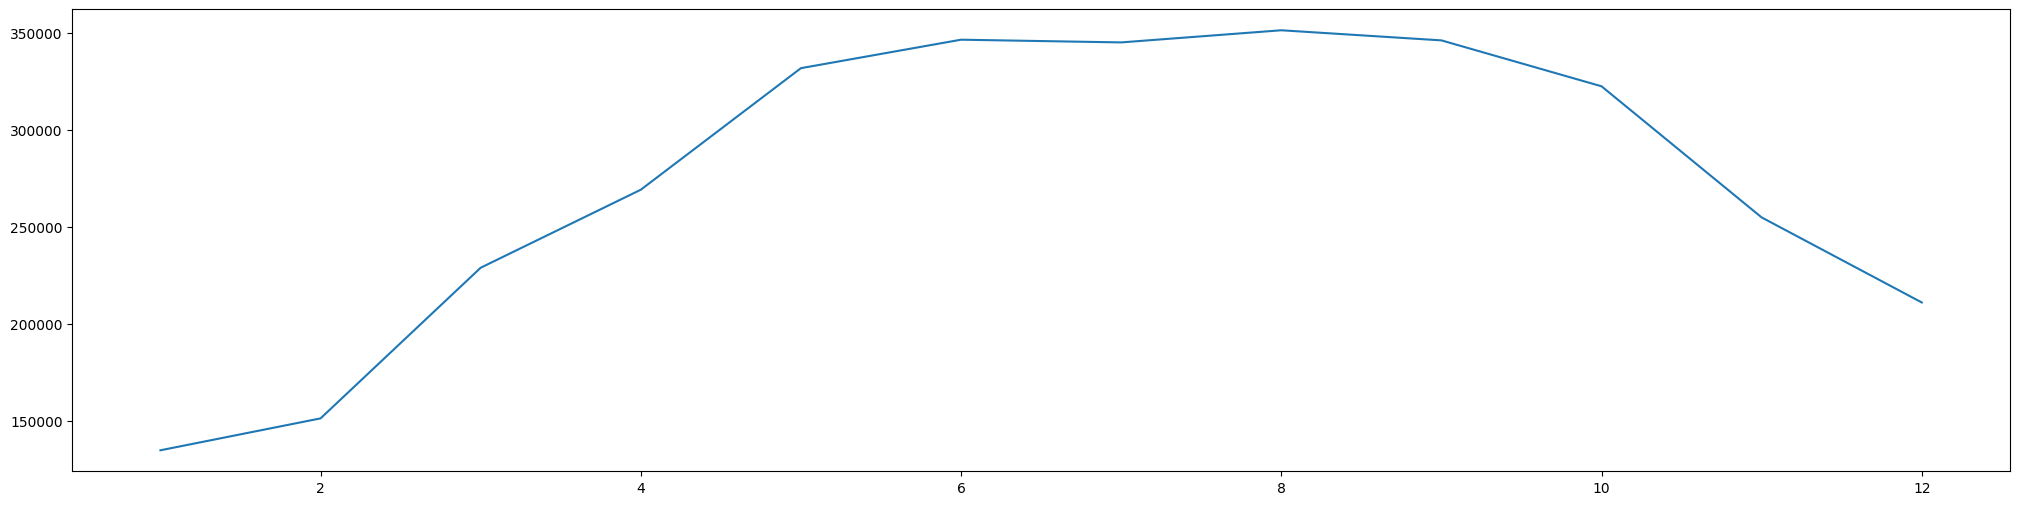

In [29]:
 #Lineplot of monthly bike sharing demand
count_date=hour_df.groupby(['mnth'])['cnt'].sum().reset_index()
fig = plt.figure(figsize=(25,6))
ax = plt.axes()
x = count_date['mnth']
ax.plot(x, count_date['cnt'])
plt.show()


### Data Wrangling

In [30]:
hour_df.rename(columns={'instant':'rec_id','dteday':'datetime','holiday':'is_holiday','workingday':'is_workingday',
                        'weathersit':'weather_condition','hum':'humidity','mnth':'month',
                        'cnt':'total_count','hr':'hour','yr':'year'},inplace=True)
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Data Vizualization
### Understand the relationships between variables

Seasonwise Hourly distribution of bikes

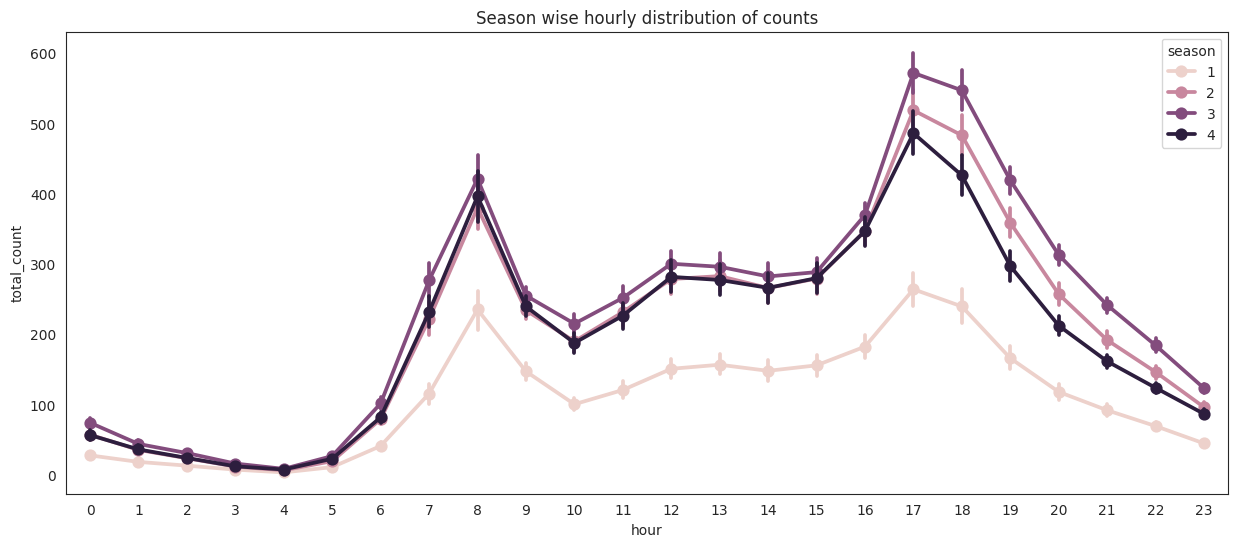

In [32]:
fig,ax=plt.subplots(figsize=(15,6))
sns.set_style('white')

sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','season']],hue='season',ax=ax)
ax.set_title('Season wise hourly distribution of counts')
plt.show()


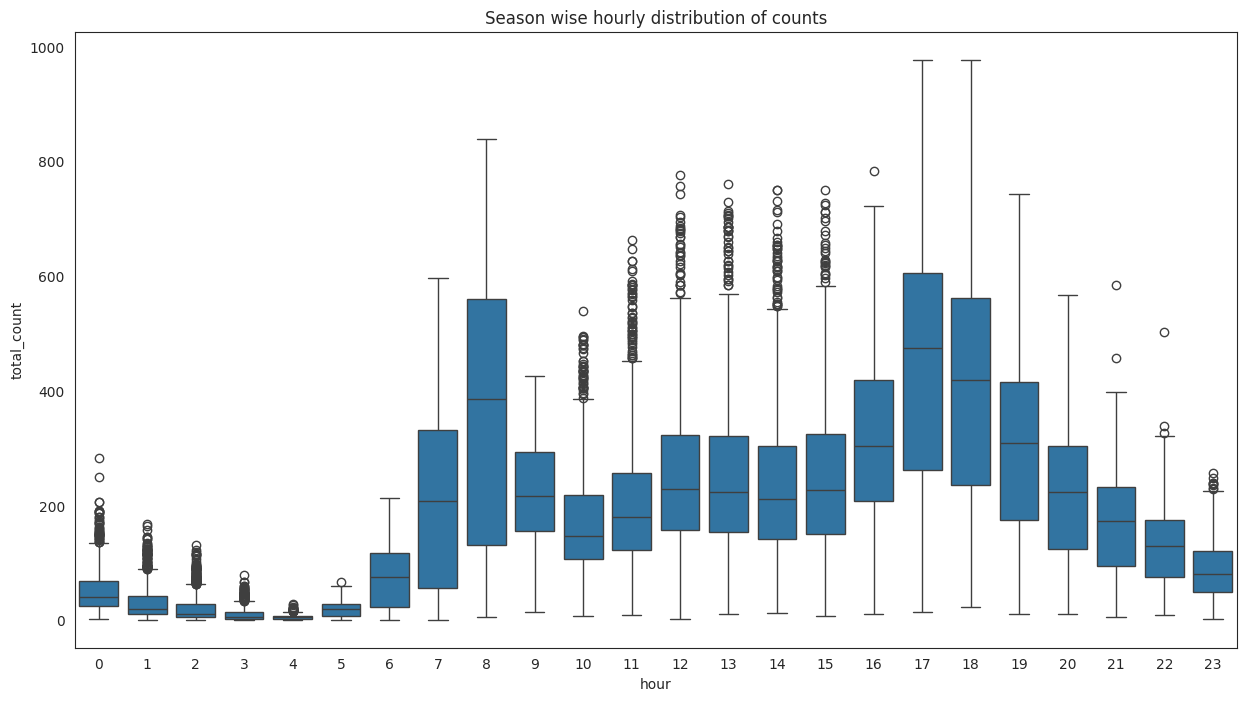

In [34]:
fig,ax1=plt.subplots(figsize=(15,8))
sns.boxplot(x='hour',y='total_count',data=hour_df[['hour','total_count']],ax=ax1)
ax1.set_title('Season wise hourly distribution of counts')
plt.show()

Weekdaywise hourly distribution of count.

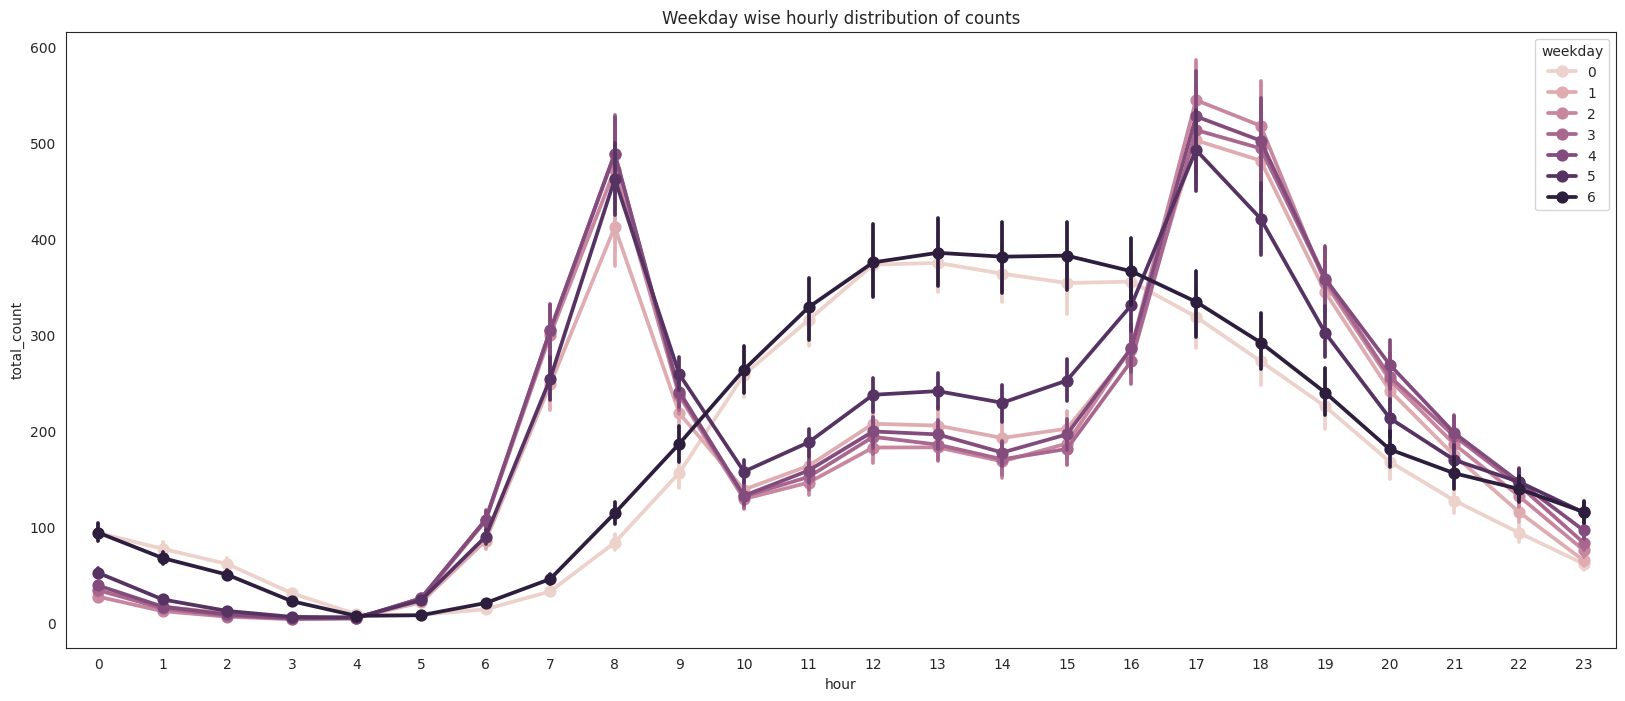

In [35]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(x='hour',y='total_count',data=hour_df[['hour','total_count','weekday']],hue='weekday')
ax.set_title('Weekday wise hourly distribution of counts')
plt.show()

Monthly distribution of counts.

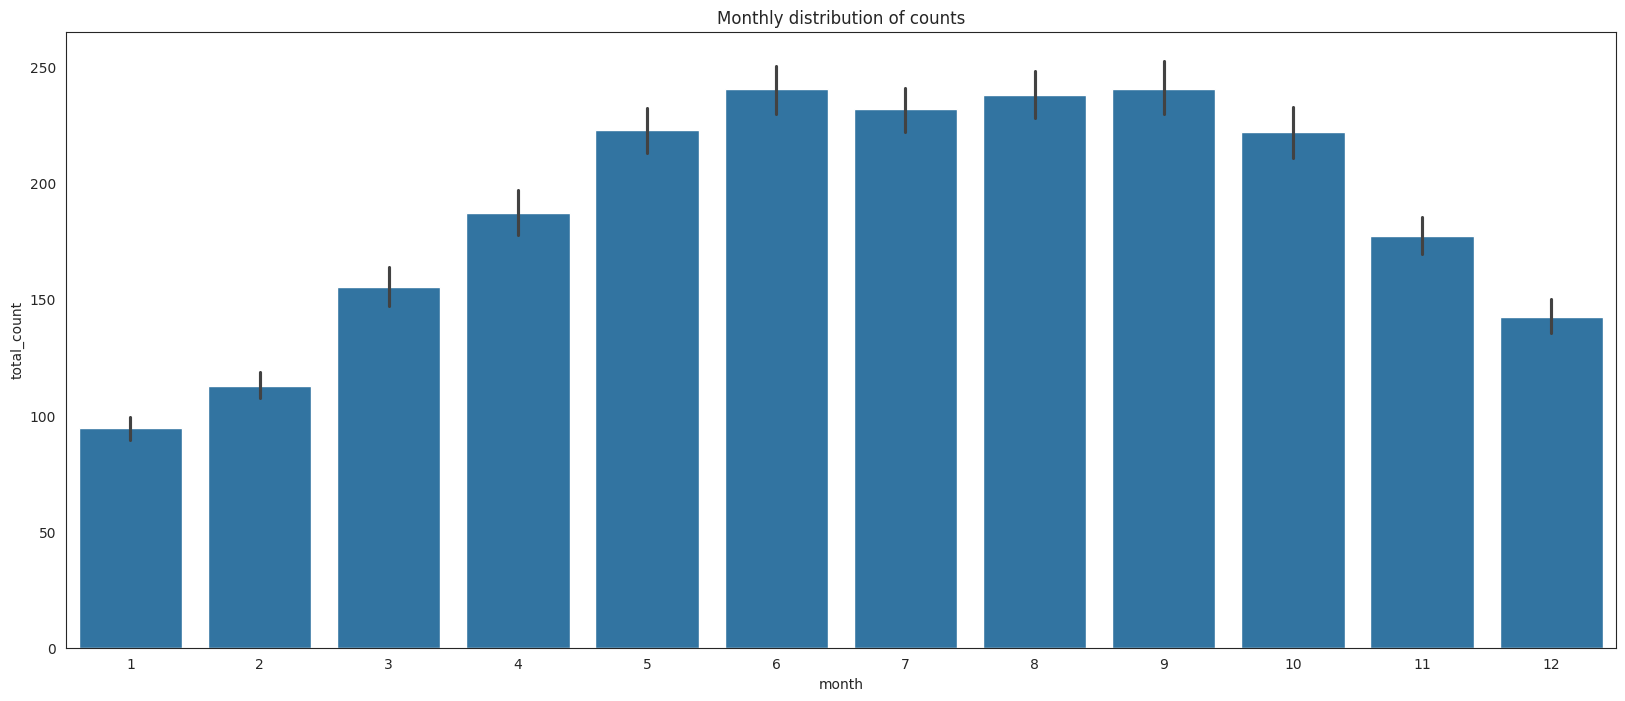

In [36]:
fig,ax1=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count']],ax=ax1)
ax1.set_title('Monthly distribution of counts')
plt.show()


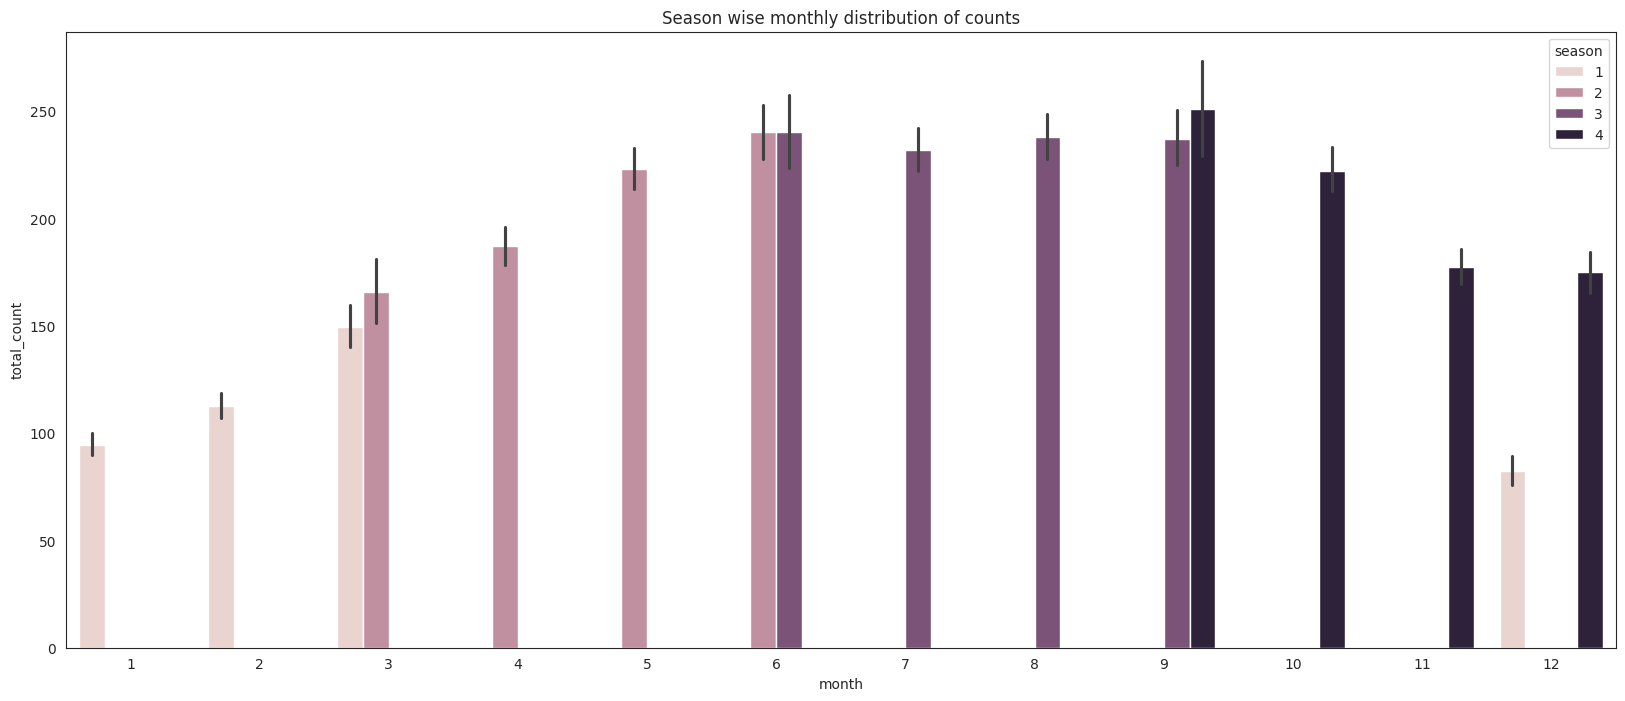

In [37]:
fig,ax2=plt.subplots(figsize=(20,8))
sns.barplot(x='month',y='total_count',data=hour_df[['month','total_count','season']],hue='season',ax=ax2)
ax2.set_title('Season wise monthly distribution of counts')
plt.show()

Yearwise Distribution of counts.

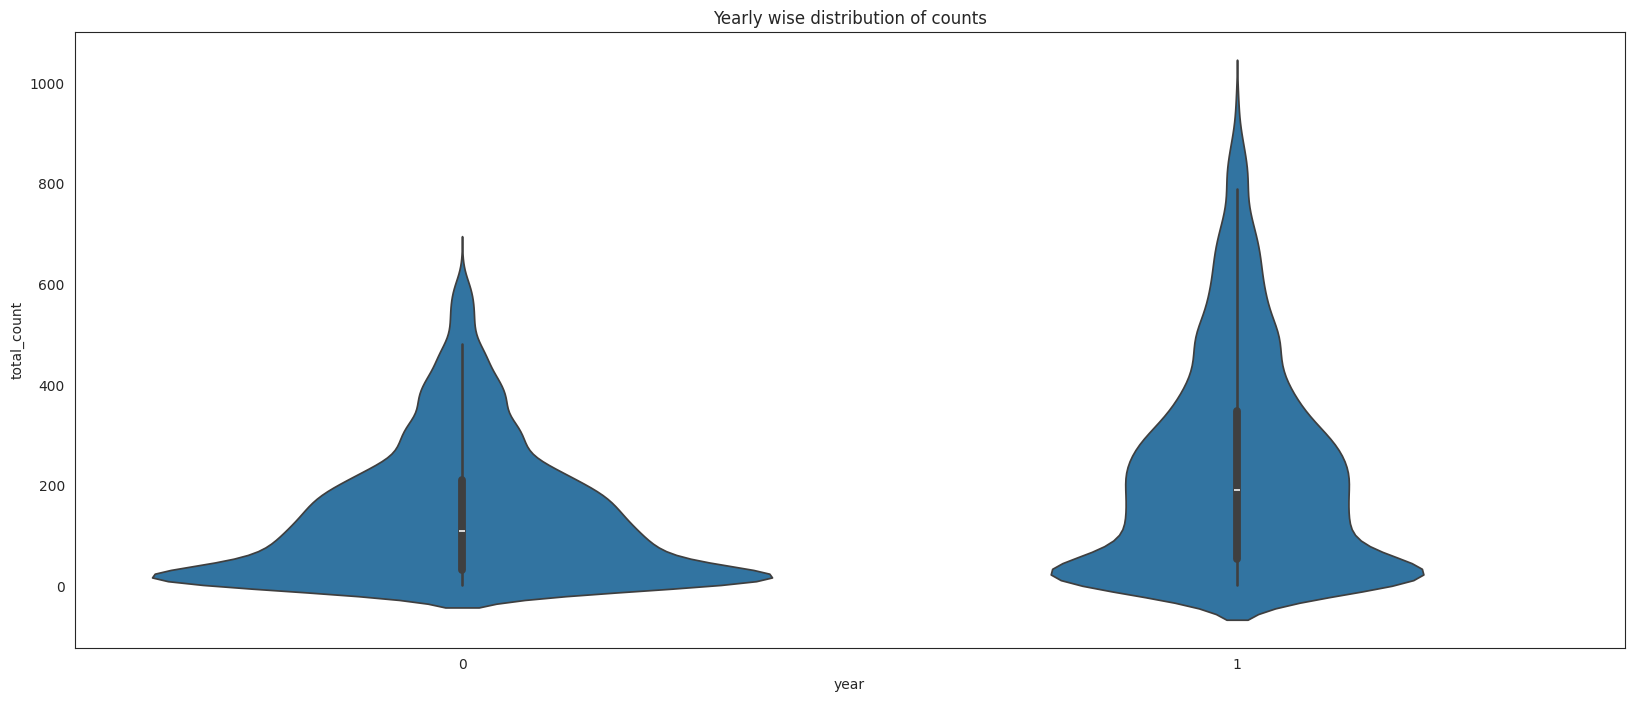

In [38]:
fig,ax=plt.subplots(figsize=(20,8))
sns.violinplot(x='year',y='total_count',data=hour_df[['year','total_count']])
ax.set_title('Yearly wise distribution of counts')
plt.show()


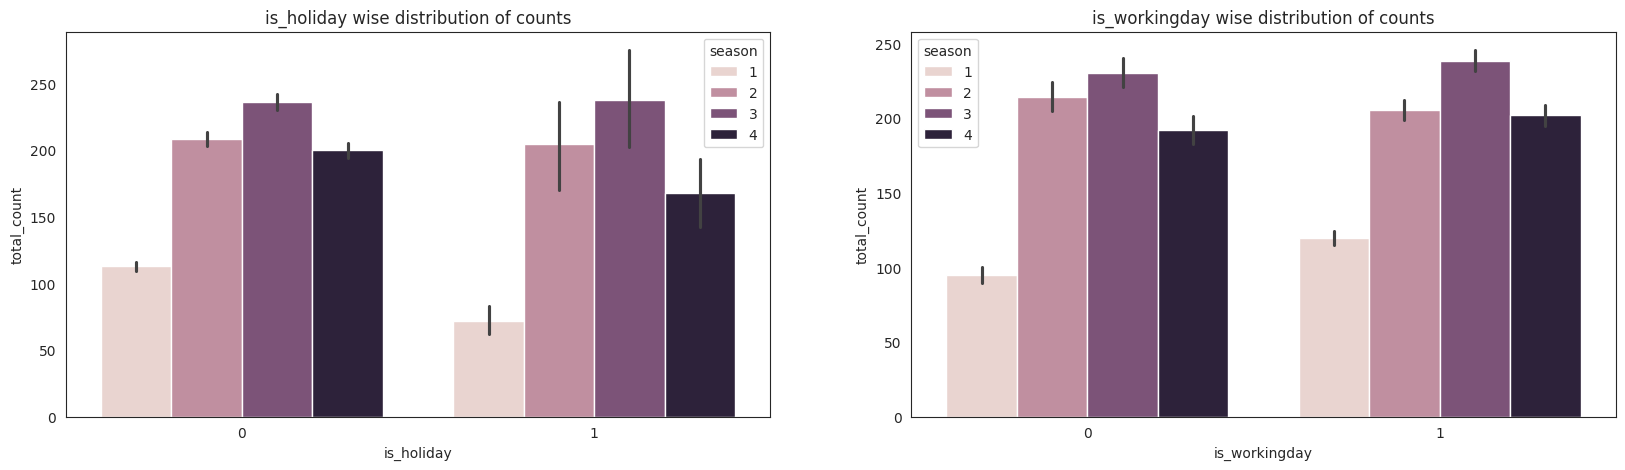

In [39]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(20,5))
sns.barplot(data=hour_df,x='is_holiday',y='total_count',hue='season',ax=ax1)
ax1.set_title('is_holiday wise distribution of counts')
sns.barplot(data=hour_df,x='is_workingday',y='total_count',hue='season',ax=ax2)
ax2.set_title('is_workingday wise distribution of counts')
plt.show()

Heatmap

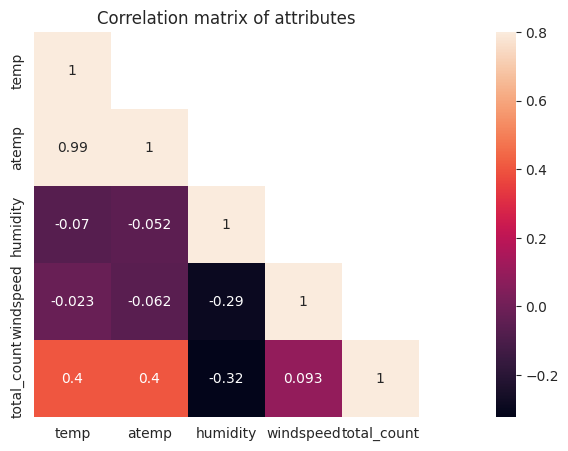

In [40]:
correMtr=hour_df[["temp","atemp","humidity","windspeed","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots(figsize=(20,5))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

Impact of Holidays

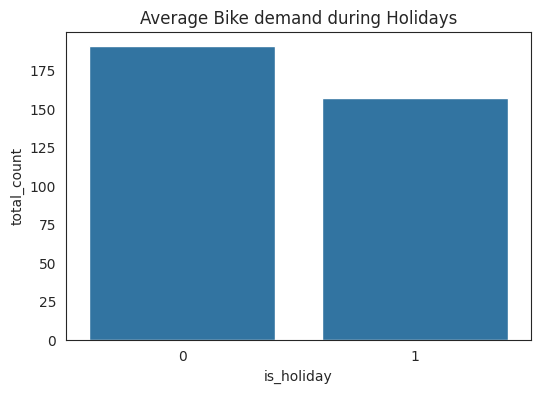

In [41]:
#Barplot of holiday vs rented bike count
y=hour_df.groupby('is_holiday')['total_count'].mean().reset_index()
fig = plt.subplots(figsize=(6, 4))
sns.barplot(x ='is_holiday',
            y ='total_count',
            data = y).set_title('Average Bike demand during Holidays')
plt.show()


##Model Training

In [43]:
#dropping id column as it is irrelevant to our analysis
hour_df=hour_df.drop(labels=['rec_id','datetime','casual','registered'],axis=1)

In [44]:
# Seprating Independent and dependent features
X = hour_df.drop(labels=['total_count'],axis=1)
Y = hour_df[['total_count']]

In [45]:
#checking target variable
Y

,total_count
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


In [46]:
# Defining which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [47]:
numerical_cols

Index(['season', 'year', 'month', 'hour', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed'],
      dtype='object')

In [48]:
# for handling Missing Values
from sklearn.impute import SimpleImputer

# for Feature Scaling
from sklearn.preprocessing import StandardScaler

# for Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

## for creating pipelines
from sklearn.pipeline import Pipeline

#for combining pipelines
from sklearn.compose import ColumnTransformer

In [49]:
# Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [50]:
## Train test split
from sklearn import preprocessing

# Example usage of a preprocessing module
scaler = preprocessing.StandardScaler()

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [51]:
#scaling dataset
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [52]:
#checking for scaling
X_train.head()

,num_pipeline__season,num_pipeline__year,num_pipeline__month,num_pipeline__hour,num_pipeline__is_holiday,num_pipeline__weekday,num_pipeline__is_workingday,num_pipeline__weather_condition,num_pipeline__temp,num_pipeline__atemp,num_pipeline__humidity,num_pipeline__windspeed
0,-0.454097,-0.998932,-0.444446,-0.804873,-0.17262,0.995400,0.679808,-0.663381,-0.192936,-0.125990,1.319069,-0.699798
1,1.351162,-0.998932,1.007950,-0.804873,5.79307,-1.001062,-1.471003,-0.663381,-0.296368,-0.213548,1.630755,-1.550843
2,-1.356727,-0.998932,-1.606364,1.500483,-0.17262,1.494516,-1.471003,0.903007,-0.503231,-0.389244,1.630755,0.272591
3,-1.356727,-0.998932,-1.025405,0.780059,-0.17262,0.995400,0.679808,-0.663381,-0.813525,-0.916330,-0.706890,0.272591
4,0.448532,1.001069,0.717471,-0.228534,-0.17262,0.995400,0.679808,-0.663381,1.151674,1.280153,0.591802,-0.457108


In [53]:
## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

#for metric evaluation
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [54]:
#function to evaluate model using mae,rmse and R2 score
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
## Training  multiple models

models={
    'LinearRegression':LinearRegression(),
    'Random Forest':RandomForestRegressor(),
    'Extra Trees Regressor':ExtraTreesRegressor()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 141.8271103556539
MAE: 105.74549274614643
R2 score 38.455933589574784




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest
Model Training Performance
RMSE: 45.53832575622851
MAE: 26.74497471550952
R2 score 93.65514359022897




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Extra Trees Regressor
Model Training Performance
RMSE: 43.01700274443903
MAE: 25.950009589566548
R2 score 94.33828539871541


